In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df1 = pd.read_csv("survey_results_2023.csv")

In [2]:
df2 = pd.read_csv("survey_results_2022.csv")

In [3]:
#df1.head()

In [4]:
#df2.head()

In [5]:
df1 = df1[["Country", "EdLevel", "YearsCodePro", "Employment", "ConvertedCompYearly"]]
df1 = df1.rename({"ConvertedCompYearly": "Salary"}, axis=1)
df1.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,NaN,NaN,NaN,NaN,NaN
1,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,"Employed, full-time",285000.0
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,"Employed, full-time",250000.0
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,"Employed, full-time",156000.0
4,Philippines,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,"Employed, full-time;Independent contractor, fr...",23456.0


In [6]:
df2 = df2[["Country", "EdLevel", "YearsCodePro", "Employment", "ConvertedCompYearly"]]
df2 = df2.rename({"ConvertedCompYearly": "Salary"}, axis=1)
df2.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,NaN,NaN,NaN,NaN,NaN
1,Canada,NaN,NaN,"Employed, full-time",NaN
2,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,"Employed, full-time",40205.0
3,Israel,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,"Employed, full-time",215232.0
4,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",3,"Employed, full-time",NaN


In [7]:
df1.shape

(89184, 5)

In [8]:
df2.shape

(73268, 5)

In [9]:
dataset = pd.concat([df1, df2], axis=0)

In [10]:
dataset.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,NaN,NaN,NaN,NaN,NaN
1,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,"Employed, full-time",285000.0
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,"Employed, full-time",250000.0
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,"Employed, full-time",156000.0
4,Philippines,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,"Employed, full-time;Independent contractor, fr...",23456.0


In [11]:
dataset.shape

(162452, 5)

In [12]:
dataset = dataset[dataset["Salary"].notnull()]
dataset.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
1,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,"Employed, full-time",285000.0
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,"Employed, full-time",250000.0
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,"Employed, full-time",156000.0
4,Philippines,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,"Employed, full-time;Independent contractor, fr...",23456.0
5,United Kingdom of Great Britain and Northern I...,Some college/university study without earning ...,21,"Employed, full-time",96828.0


In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86090 entries, 1 to 73121
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       86090 non-null  object 
 1   EdLevel       86073 non-null  object 
 2   YearsCodePro  85760 non-null  object 
 3   Employment    86074 non-null  object 
 4   Salary        86090 non-null  float64
dtypes: float64(1), object(4)
memory usage: 3.9+ MB


In [14]:
dataset = dataset.dropna()
dataset.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [15]:
dataset.shape

(85732, 5)

In [16]:
dataset = dataset[dataset["Employment"] == "Employed, full-time"]
dataset = dataset.drop("Employment", axis=1)

In [17]:
dataset.head()

,Country,EdLevel,YearsCodePro,Salary
1,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,285000.0
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,250000.0
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,156000.0
5,United Kingdom of Great Britain and Northern I...,Some college/university study without earning ...,21,96828.0
6,United States of America,Some college/university study without earning ...,3,135000.0


In [18]:
dataset.shape

(70537, 4)

In [19]:
dataset['Country'].value_counts()

United States of America                                18427
Germany                                                  5583
United Kingdom of Great Britain and Northern Ireland     5413
India                                                    3469
Canada                                                   3056
                                                        ...  
Niger                                                       1
Mauritania                                                  1
Sierra Leone                                                1
Guinea-Bissau                                               1
Seychelles                                                  1
Name: Country, Length: 173, dtype: int64

In [20]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [21]:
country_map = shorten_categories(dataset.Country.value_counts(), 700)
dataset['Country'] = dataset['Country'].map(country_map)
dataset.Country.value_counts()

United States of America                                18427
Other                                                   16668
Germany                                                  5583
United Kingdom of Great Britain and Northern Ireland     5413
India                                                    3469
Canada                                                   3056
France                                                   2584
Brazil                                                   1986
Spain                                                    1824
Netherlands                                              1703
Australia                                                1685
Italy                                                    1493
Sweden                                                   1443
Poland                                                   1312
Switzerland                                               927
Israel                                                    761
Russian 

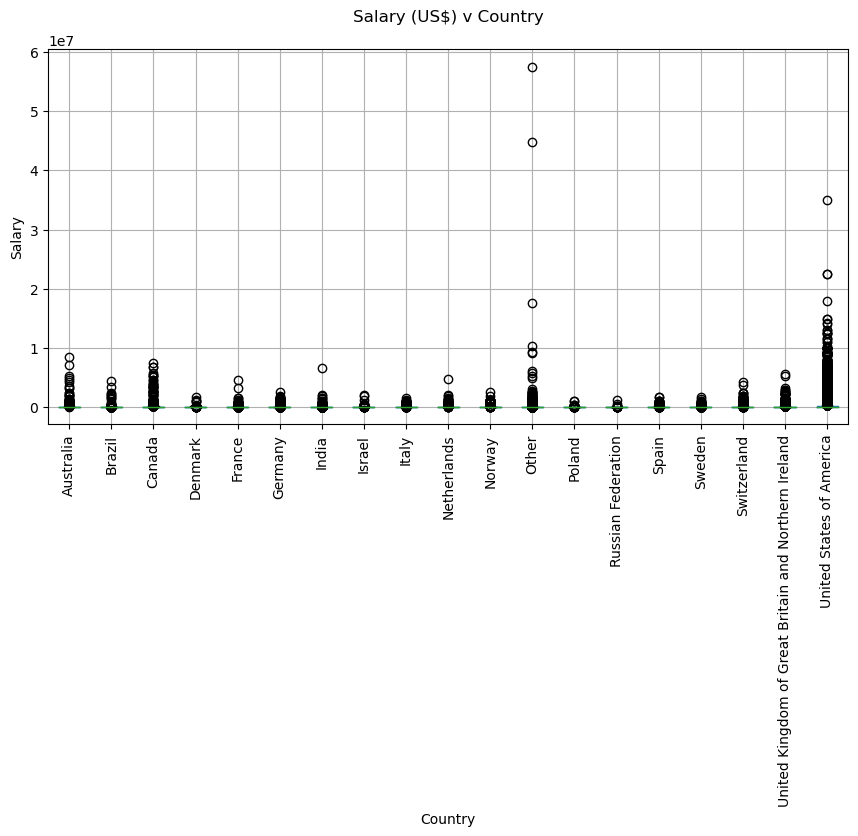

In [24]:
fig, ax = plt.subplots(1,1, figsize=(10, 5))
dataset.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [26]:
dataset['Salary'].unique()

array([285000., 250000., 156000., ...,  16203.,  43324., 110245.])

In [36]:
dataset = dataset[dataset["Salary"] <= 300000]
dataset = dataset[dataset["Salary"] >= 10000]
dataset = dataset[dataset['Country'] != 'Other']

In [37]:
dataset.shape

(49596, 4)

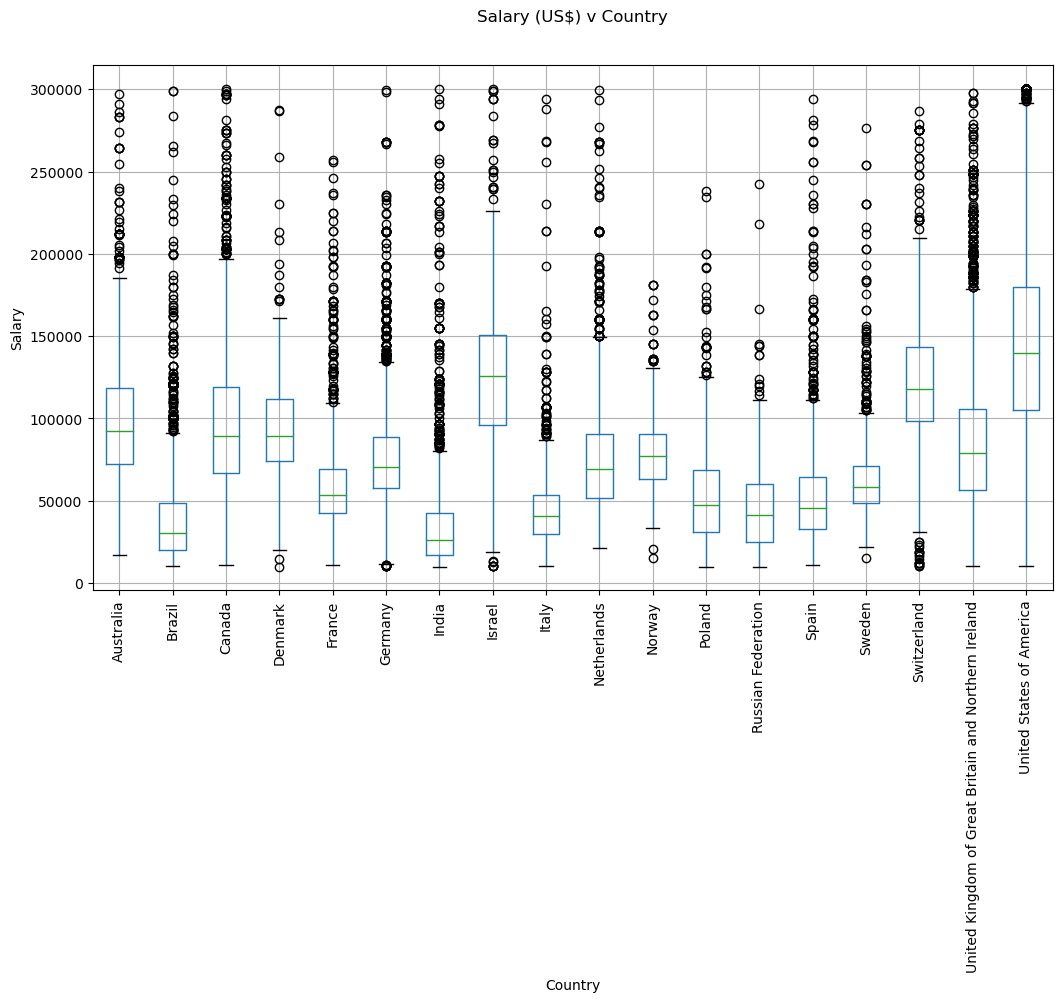

In [38]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
dataset.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [39]:
dataset["YearsCodePro"].unique()

array(['9', '23', '7', '21', '3', 'Less than 1 year', '10', '2', '6',
       '14', '5', '15', '19', '13', '16', '28', '24', '25', '12', '4',
       '20', '8', '18', '30', '27', '17', '43', '38', '33', '29', '22',
       '1', '11', '34', '42', '26', '31', '36', '39', '40', '32', '44',
       '37', '35', '48', 'More than 50 years', '45', '41', '50', '46',
       '49', '47'], dtype=object)

In [40]:
def clean_experience(x):
    if x ==  'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

dataset['YearsCodePro'] = dataset['YearsCodePro'].apply(clean_experience)

In [41]:
dataset["EdLevel"].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Some college/university study without earning a degree',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Primary/elementary school', 'Something else',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)'], dtype=object)

In [42]:
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

dataset['EdLevel'] = dataset['EdLevel'].apply(clean_education)

In [43]:
dataset.head()

,Country,EdLevel,YearsCodePro,Salary
1,United States of America,Bachelor’s degree,9.0,285000.0
2,United States of America,Bachelor’s degree,23.0,250000.0
3,United States of America,Bachelor’s degree,7.0,156000.0
5,United Kingdom of Great Britain and Northern I...,Less than a Bachelors,21.0,96828.0
6,United States of America,Less than a Bachelors,3.0,135000.0


In [44]:
dataset["EdLevel"].unique()

array(['Bachelor’s degree', 'Less than a Bachelors', 'Master’s degree',
       'Post grad'], dtype=object)

In [45]:
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
dataset['EdLevel'] = le_education.fit_transform(dataset['EdLevel'])
dataset["EdLevel"].unique()

array([0, 1, 2, 3])

In [46]:
le_country = LabelEncoder()
dataset['Country'] = le_country.fit_transform(dataset['Country'])
dataset["Country"].unique()

array([17, 16,  0,  9,  5, 14,  4, 13,  1,  8,  2, 15,  6, 10, 12,  3,  7,
       11])

In [55]:
X = dataset.drop("Salary", axis=1)
y = dataset["Salary"]

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

max_depth = [None, 2,4,6,8,10,12]
parameters = {"max_depth": max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X, y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [58]:
regressor = gs.best_estimator_

regressor.fit(X, y.values)
y_pred = regressor.predict(X)
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$39,087.07


In [59]:
X

,Country,EdLevel,YearsCodePro
1,17,0,9.0
2,17,0,23.0
3,17,0,7.0
5,16,1,21.0
6,17,1,3.0
...,...,...,...
73113,17,2,5.0
73116,17,0,16.0
73119,17,0,1.0
73120,13,0,2.0


In [60]:
import pickle

In [61]:
data = {"model": regressor, "le_country": le_country, "le_education": le_education}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [62]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
le_country = data["le_country"]
le_education = data["le_education"]